In [22]:
from asyncio import sleep

import httpx

url = "https://purchase.wolfeycode.com"
client = httpx.AsyncClient(base_url=url)


async def get_page(page_num: int):
    print(f"getting page {page_num} ...")
    querystring = {"page": page_num}
    res = await client.get("/purchase", params=querystring)
    await sleep(3 + page_num)
    print(f"got page {page_num}")
    res_json = res.json()
    purchases = res_json["purchases"]
    return purchases

In [28]:
import asyncio
from itertools import chain

import polars as pl

page_zero_job = get_page(0)
page_one_job = get_page(1)

page_zero, page_one = await asyncio.gather(page_zero_job, page_one_job)

both_responses = chain(page_zero, page_one)
purchase_lf = pl.LazyFrame(both_responses)


purchase_lf.collect()

getting page 0 ...
getting page 1 ...
got page 0
got page 1


account_number,merchant_category_code,merchant_name,merchant_number,merchant_state,post_date,purchase_amount,purchase_datetime,purchase_number
i64,i64,str,str,str,str,str,str,i64
26669,5541,"""SHELL SERVICE …","""00000000025746…","""OH""","""2021-04-11""","""-12.00""","""2021-04-10T14:…",16
37466,5411,"""WHOLEFDS MTH#1…","""00004740504800…","""OH""","""2021-04-11""","""-88.12""","""2021-04-10T12:…",164
38256,5411,"""SPROUTS FARMER…","""00000000057636…","""OH""","""2021-04-11""","""-25.22""","""2021-04-10T12:…",5
38256,5411,"""SAFEWAY #1566 …","""00000000045900…","""OH""","""2021-04-11""","""-2.83""","""2021-04-10T10:…",4
38256,5411,"""SPROUTS FARMER…","""00000000057636…","""OH""","""2021-04-11""","""-80.65""","""2021-04-10T07:…",3
38256,5411,"""SAFEWAY #1566 …","""00000000045900…","""OH""","""2021-04-11""","""-146.56""","""2021-04-10T07:…",2
26603,5812,"""DOORDASH DASHP…","""1VKWOGBF44BU45…","""NY""","""2021-04-10""","""-9.99""","""2021-04-10T01:…",47
17478,4789,"""HOURCAR.ORG SA…","""Z1VT06DY82I44G…","""AR""","""2021-04-10""","""-48.18""","""2021-04-09T22:…",1
26995,8398,"""FBPAY American…","""52702100020498…","""NY""","""2021-04-10""","""-45.00""","""2021-04-09T21:…",18


In [24]:
purchase_lf = purchase_lf.with_columns(pl.col("purchase_amount").cast(pl.Float32))
purchase_lf.collect()

account_number,merchant_category_code,merchant_name,merchant_number,merchant_state,post_date,purchase_amount,purchase_datetime,purchase_number
i64,i64,str,str,str,str,f32,str,i64
26669,5541,"""SHELL SERVICE …","""00000000025746…","""OH""","""2021-04-11""",-12.0,"""2021-04-10T14:…",16
37466,5411,"""WHOLEFDS MTH#1…","""00004740504800…","""OH""","""2021-04-11""",-88.120003,"""2021-04-10T12:…",164
38256,5411,"""SPROUTS FARMER…","""00000000057636…","""OH""","""2021-04-11""",-25.219999,"""2021-04-10T12:…",5
38256,5411,"""SAFEWAY #1566 …","""00000000045900…","""OH""","""2021-04-11""",-2.83,"""2021-04-10T10:…",4
38256,5411,"""SPROUTS FARMER…","""00000000057636…","""OH""","""2021-04-11""",-80.650002,"""2021-04-10T07:…",3
38256,5411,"""SAFEWAY #1566 …","""00000000045900…","""OH""","""2021-04-11""",-146.559998,"""2021-04-10T07:…",2
26603,5812,"""DOORDASH DASHP…","""1VKWOGBF44BU45…","""NY""","""2021-04-10""",-9.99,"""2021-04-10T01:…",47
17478,4789,"""HOURCAR.ORG SA…","""Z1VT06DY82I44G…","""AR""","""2021-04-10""",-48.18,"""2021-04-09T22:…",1
26995,8398,"""FBPAY American…","""52702100020498…","""NY""","""2021-04-10""",-45.0,"""2021-04-09T21:…",18


In [25]:
from typing import Callable, Optional


def get_agg(attr_str: str) -> Optional[Callable[..., pl.Expr]]:
    return getattr(pl, attr_str, None)

In [26]:
aggfn = get_agg("sum")

if aggfn is None:
    raise ValueError("aggfn is None")

(
    purchase_lf.group_by("merchant_number")
    .agg(aggfn("purchase_amount"))
    .sort("purchase_amount")
    .collect()
)
# time,

merchant_number,purchase_amount
str,f32
"""64QIF4W7QVYGWL…",-1663.709961
"""00039570810451…",-400.0
"""00037204881988…",-172.809998
"""00000000045900…",-149.389999
"""4445900003510""",-130.899994
"""00000000518648…",-106.440002
"""00000000057636…",-105.870003
"""00044517720199…",-95.43
"""00004740504800…",-88.120003


In [27]:
account_json = requests.get(
    "https://purchase.wolfeycode.com/account", params={"page": 0}
).json()

account_lf = pl.LazyFrame(account_json)
account_lf.collect()

NameError: name 'requests' is not defined

In [ ]:
account_lf = account_lf.unnest("accounts")
account_lf.collect()

account_number,account_state,city,dob,email_address,first_name,last_name,mobile_number,ssn,street_address,unit,zip,eof
i64,str,str,str,str,str,str,str,str,str,i64,i64,bool
37226,"""NY""","""Middle Island""","""1965-12-12""","""amaclead@gmail…","""Maclead""","""Abel""","""2158741229""","""282-99-7138""","""37275 St Rt 1…",null,11953,false
33555,"""NY""","""Middle Island""","""1965-12-12""","""mabel99@gmail.…","""Monica""","""Abel""","""2158741229""","""282-99-2555""","""13727 St Rt 1…",null,11953,false
17079,"""NJ""","""Dunellen""","""1993-01-31""","""albina@glick.c…","""Glick""","""Albina""","""2017096245""","""798-85-9268""","""4 Ralph Ct""",null,8812,false
19820,"""CO""","""Boulder""","""1990-06-01""","""alease@buemi.c…","""Buemi""","""Alease""","""5047105840""","""335-82-1590""","""4 Webbs Chapel…",null,80303,false
30881,"""NJ""","""Middlesex""","""1949-08-29""","""alisha@slusars…","""Slusarski""","""Alisha""","""5189667987""","""537-64-6119""","""3273 State St""",null,8846,false
26603,"""NY""","""New York""","""1942-01-22""","""asergi@gmail.c…","""Sergi""","""Alishia""","""7329247882""","""981-71-5987""","""2742 Distribut…",null,10025,false
33152,"""WI""","""Stevens Point""","""1985-02-24""","""allene_iturbid…","""Iturbide""","""Allene""","""7326583154""","""771-35-1835""","""1 Central Ave""",null,54481,false
36453,"""PA""","""Jenkintown""","""1954-10-18""","""amber_monarrez…","""Monarrez""","""Amber""","""5169686051""","""544-01-9522""","""14288 Foster A…",4121,19046,false
26777,"""OH""","""Columbus""","""1975-01-10""","""ammie@corrio.c…","""Corrio""","""Ammie""","""9363363951""","""865-62-8550""","""74874 Atlantic…",null,43215,false


In [ ]:
purchase_lf.select(pl.col("account_number")).unique().collect()

account_number
i64
36717
14328
20253
16068
31010
20908
31815
19505
20759


In [ ]:
top_purchasing_accounts = (
    purchase_lf.group_by("account_number")
    .agg(pl.col("purchase_amount").abs().sum().alias("sum_purchase_amount"))
    .top_k(10, by="sum_purchase_amount")
    .collect()
)
top_purchasing_accounts

account_number,sum_purchase_amount
i64,f32
35903,1663.709961
38256,255.259995
20908,172.809998
33717,132.139999
22965,124.010002
20759,106.440002
37466,88.120003
19505,65.230003
14328,59.990002


<Axes: xlabel='account_number', ylabel='sum_purchase_amount'>

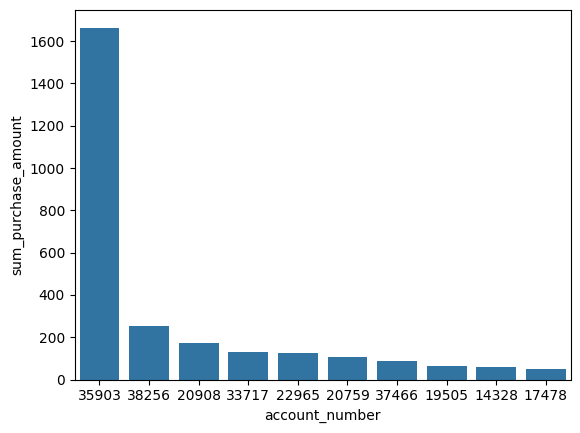

In [ ]:
import seaborn as sns

sns.barplot(
    top_purchasing_accounts,
    x="account_number",
    y="sum_purchase_amount",
    order=top_purchasing_accounts.get_column("account_number"),
)